In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow


     ---------------------------------------- 65.6/65.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
     ---------------------------------------- 112.2/112.2 kB ? eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 1.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135767 sha256=cf256c03e8d8b9cacfbcafd7ec685c6e52a6dee2c5373017cd1e63595b60f1c8
  Stored in directory: c:\users\ki\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5a586c8
Successfully built peewee
  Attempting uninstall: requests
    Found existing installa

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.27 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


[*********************100%%**********************]  1 of 1 completed
Epoch 1/10
107/107 [==============================] - 23s 109ms/step - loss: 0.0087
Epoch 2/10
107/107 [==============================] - 11s 103ms/step - loss: 5.5568e-04
Epoch 3/10
107/107 [==============================] - 12s 114ms/step - loss: 5.7002e-04
Epoch 4/10
107/107 [==============================] - 12s 110ms/step - loss: 6.4409e-04
Epoch 5/10
107/107 [==============================] - 12s 112ms/step - loss: 5.5050e-04
Epoch 6/10
107/107 [==============================] - 12s 110ms/step - loss: 5.0272e-04
Epoch 7/10
107/107 [==============================] - 12s 111ms/step - loss: 4.4073e-04
Epoch 8/10
107/107 [==============================] - 12s 111ms/step - loss: 4.4300e-04
Epoch 9/10
107/107 [==============================] - 12s 110ms/step - loss: 3.9905e-04
Epoch 10/10
107/107 [==============================] - 12s 111ms/step - loss: 3.5243e-04
[*********************100%%**********************]  1 

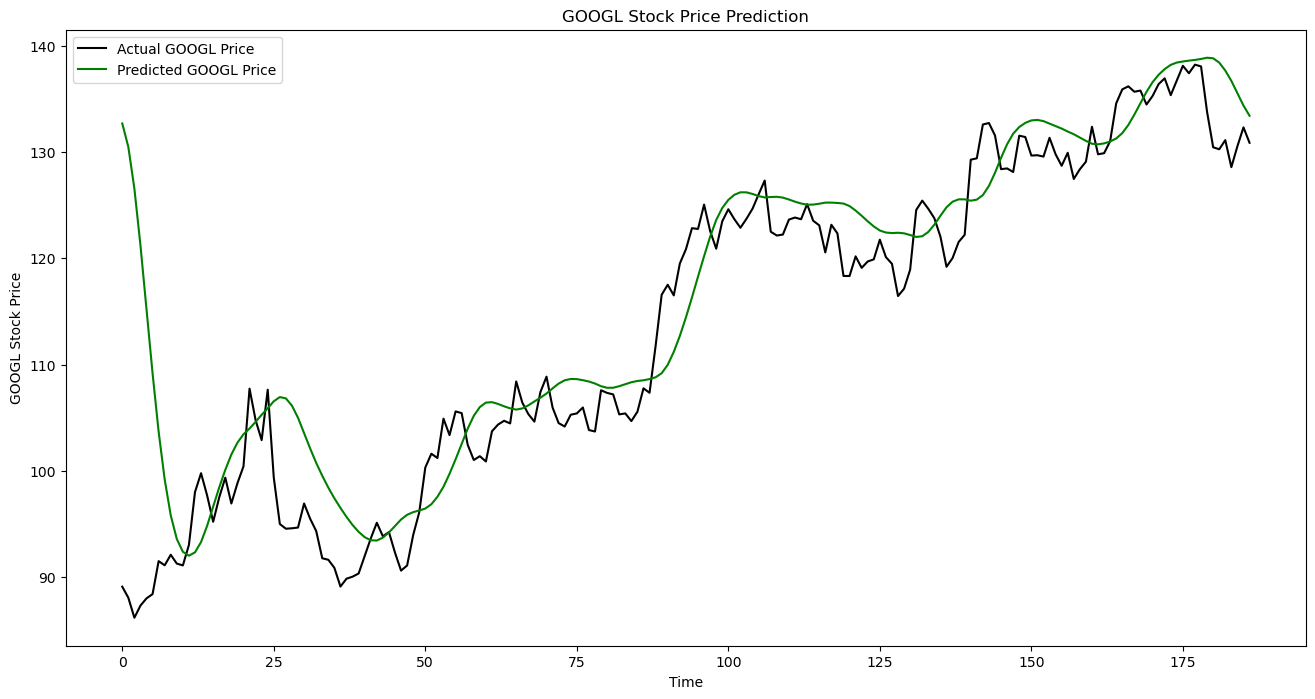

In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from IPython.display import Image

# Fetching stock data for Google
stock_name = 'GOOGL' 
data = yf.download(stock_name, start='2010-01-01', end='2023-10-01')

# Prepare the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60  # Adjust as needed

x_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32)  # Reduce epochs to 10

# Test the model on existing data
test_start = '2023-01-01'  # Adjust as needed
test_data = yf.download(stock_name, start=test_start, end='2023-10-01')
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualize the results
plt.figure(figsize=(16, 8))
plt.plot(actual_prices, color='black', label=f"Actual {stock_name} Price")
plt.plot(predicted_prices, color='green', label=f"Predicted {stock_name} Price")
plt.title(f"{stock_name} Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel(f'{stock_name} Stock Price')
plt.legend()
plt.show()


In [ ]:
pip install pandas scikit-learn


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from seaborn import load_dataset

# Loading the dataset
titanic_data = load_dataset('titanic')
print(titanic_data.head())
# Preprocessing the data
titanic_data.dropna(inplace=True)  # Dropping rows with missing values for simplicity
label_encoder = LabelEncoder()
titanic_data['sex'] = label_encoder.fit_transform(titanic_data['sex'])

# Selecting features and target variable
X = titanic_data[['pclass', 'sex', 'age']]
y = titanic_data['survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
Accuracy: 0.7567567567567568
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.78      0.88      0.82        24

   